In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Dataset/No_Mask/00000_Mask_Mouth_Chin.jpg")

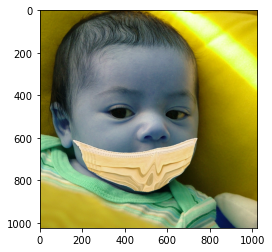

In [3]:
plt.imshow(img_array)

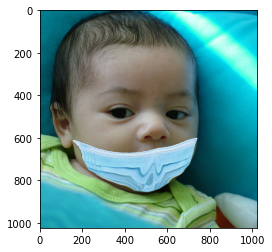

In [4]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [5]:
img_array.shape

(1024, 1024, 3)

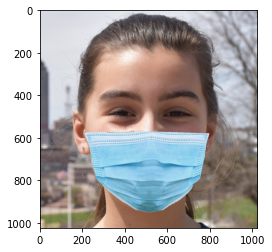

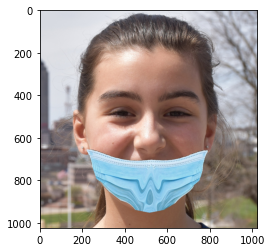

In [6]:
Datadirectory = "Dataset/"
Classes=["Face_Mask","No_Mask"]
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
   img_array = cv2.imread(os.path.join(path,img))

  plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
  plt.show()

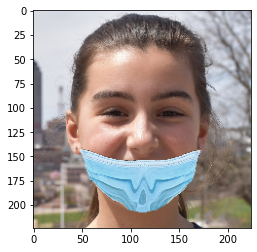

In [7]:
#resizing
img_size=224

new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

# Rereading the images and converting all to array

In [8]:
training_Data=[]
def create_training_Data():
  for category in Classes:
     path = os.path.join(Datadirectory, category)
     class_num = Classes.index(category)
     for img in os.listdir(path):
       try:
         img_array=cv2.imread(os.path.join(path, img))
         new_array=cv2.resize(img_array, (img_size, img_size))
         training_Data.append([new_array, class_num])
       except Exception as e:
         pass  

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

1878


In [11]:
import random
random.shuffle(training_Data)

In [12]:
X = []
y = []

for features,label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3)

In [13]:
X.shape

(1878, 224, 224, 3)

In [14]:
#normalize the data
X=X/255.0;

In [15]:
y[1]

0

In [16]:
y[1000]

1

In [17]:
Y=np.array(y)

In [18]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [19]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

# Deep Learning Model for Training- Transfer Learning# 

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model=tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Transfer Learning- Tuning, weights will start from last check point

In [22]:
base_input = model.layers[0].input

In [23]:
base_output = model.layers[-4].output

In [24]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [25]:
new_model = keras.Model(inputs=base_input, outputs=final_output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Settings for binary classification(Face mask/with outmask)

In [26]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
new_model.fit(X,Y,epochs=2, validation_split=0.1)
              

Epoch 1/2
53/53 [==============================] - 169s 3s/step - loss: 0.0825 - accuracy: 0.9751 - val_loss: 0.5697 - val_accuracy: 0.9149
Epoch 2/2
53/53 [==============================] - 167s 3s/step - loss: 0.0373 - accuracy: 0.9893 - val_loss: 0.0307 - val_accuracy: 0.9894


In [27]:
#freezing all layers
#for layer in model.layer:
 # layer.trainable= false

In [28]:
#freezing a particular layer
#model.layers[0].trainable=false

In [29]:
new_model.save('my_model.h5')

In [30]:
new_model= tf.keras.models.load_model('my_model.h5')

# Checking the network for Predictions

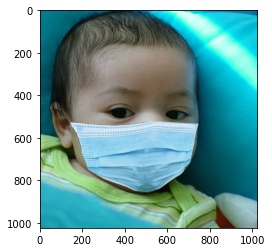

In [31]:
frame = cv2.imread('Dataset/Face_Mask/00000_Mask.jpg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [32]:
final_image= cv2.resize(frame, (224,224))
final_image= np.expand_dims(final_image, axis=0)
final_image= final_image/255.0

In [33]:
Predictions= new_model.predict(final_image)

1/1 [==============================] - 1s 981ms/step


In [34]:
Predictions

array([[3.574645e-09]], dtype=float32)

# check1 with mask 

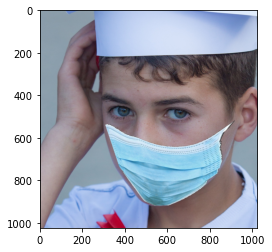

In [35]:
frame = cv2.imread('Dataset/Face_Mask/00051_Mask.jpg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [36]:
final_image= cv2.resize(frame, (224,224))
final_image= np.expand_dims(final_image, axis=0)
final_image= final_image/255.0

In [37]:
Predictions= new_model.predict(final_image)

1/1 [==============================] - 0s 67ms/step


In [38]:
Predictions

array([[7.041008e-08]], dtype=float32)

# Checking the network for unknown images

# check 1

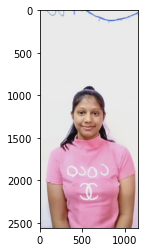

In [39]:
frame= cv2.imread('IMG20220501130011.jpg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [40]:
frame.shape

(2560, 1152, 3)

In [41]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')

In [42]:
gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [43]:
gray.shape

(2560, 1152)

In [44]:
faces =faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
   roi_gray= gray[y:y+h, x:x+w]
   roi_color= frame[y:y+h, x:x+w]
   cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
   facess = faceCascade.detectMultiScale(roi_gray)
   if len(facess) == 0:
     print("Face not detected")
   else:
     for(ex, ey, ew, eh) in facess:
       face_roi = roi_color[ey:ey+eh, ex:ex+ew]

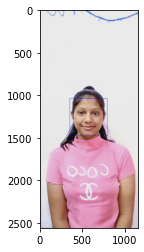

In [45]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

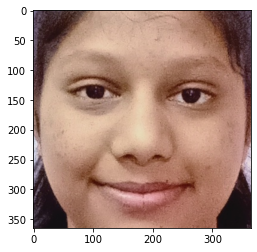

In [46]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [47]:
final_image= cv2.resize(face_roi , (224,224))
final_image= np.expand_dims(final_image, axis=0)
final_image= final_image/255.0

In [48]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 71ms/step


In [49]:
Predictions

array([[0.9999019]], dtype=float32)

# check 2

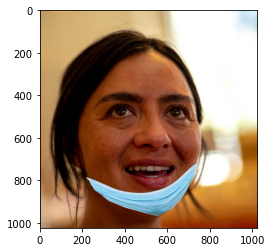

In [50]:
frame= cv2.imread('Dataset/No_Mask/00017_Mask_Chin.jpg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [51]:
#faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')

In [52]:
#gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

faces =faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
   roi_gray= gray[y:y+h, x:x+w]
   roi_color= frame[y:y+h, x:x+w]
   cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
   facess = faceCascade.detectMultiScale(roi_gray)
   if len(facess) == 0:
     print("Face not detected")
   else:
     for(ex, ey, ew, eh) in facess:
       face_roi = roi_color[ey:ey+eh, ex:ex+ew]

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [53]:
#plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [54]:
final_image= cv2.resize(frame , (224,224))
final_image= np.expand_dims(final_image, axis=0)
final_image= final_image/255.0

In [55]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 74ms/step


In [56]:
Predictions

array([[1.]], dtype=float32)

# Realtime Video Demo
# Face Mask Detection

In [57]:
import cv2

In [58]:
path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

In [59]:
#setting the rectangle background to white
rectangle_bgr=(255,255,255)

In [60]:
# making black image
img = np.zeros((500,500))

In [61]:
# setting some text
text = "Some text in the box!"

In [62]:
# getting the width and heigth of the text box
(text_width, text_height) = cv2.getTextSize(text,font, fontScale=font_scale, thickness=1)[0]

In [63]:
# setting the text start position
text_offset_x=10
text_offset_y = img.shape[0]-25

In [64]:
# making the coordinates of the box with a small padding of two pixels
box_coords = ((text_offset_x,text_offset_y), (text_offset_x+text_width+2, text_offset_y-text_height-2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text,(text_offset_x,text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cap = cv2.VideoCapture(1)
#Checking if the webcam is opened correctly
if not cap.isOpened():
   cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")

while True:
  ret,frame = cap.read()
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray, 1.1, 4)
  for x,y,w,h in faces:
      roi_gray= gray[y:y+h, x:x+w]
      roi_color= frame[y:y+h, x:x+w]
      #cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
      facess = faceCascade.detectMultiScale(roi_gray)
      if len(facess) == 0:
          print("Face not detected")
      else:
         for(ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]
  final_image= cv2.resize(face_roi , (224,224))
  final_image= np.expand_dims(final_image, axis=0)
  final_image= final_image/255.0   
  font = cv2.FONT_HERSHEY_SIMPLEX
  Predictions = new_model.predict(final_image)  


  font_scale=1.5
  font = cv2.FONT_HERSHEY_PLAIN


  if (Predictions[0] > 0.1):
      status = "NO MASK"

      x1,y1,w1,h1 = 0,0,175,75
      #Drawing black background rectangle
      cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1), (0,0,0), -1)
      cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
      cv2.putText(frame, status, (100,150),font, 3, (0,0,255),2 ,cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))

  else:
      status = "FACE MASK"

      x1,y1,w1,h1 = 0,0,175,75
  #Drawing black background rectangle
      cv2.rectangle(frame, (x1,x1),(x1+w1,y1+h1), (0,0,0), -1)
      cv2.putText(frame, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0),2)
      cv2.putText(frame, status, (100,150),font, 3, (0,255,0),2 ,cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))



  cv2.imshow('Face Mask Detection IT WORKSHOP', frame)

  if cv2.waitKey(2) & 0xFF == ord('q'):
     break

cap.release()
cv2.destroyAllWindows()     

1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 51ms/step
Face not detected
1/1 [==============================]

1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 49ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 49ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [=============

1/1 [==============================] - 0s 34ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 50ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 49ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [=============

1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 53ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 50ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Fa

1/1 [==============================] - 0s 44ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 50ms/step
Face not detected
1/1 [==============================] - 0s 53ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
Face not detected


1/1 [==============================] - 0s 63ms/step
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 64ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 74ms/step
Face not detected
1/1 [==============================] - 0s 63ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 65ms/step
Face not detected
1/1 [==============================] - 0s 85ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 67ms/step
Face not detected
1/1 [==============================] - 0s 73ms/step
Fa

1/1 [==============================] - 0s 63ms/step
Face not detected
1/1 [==============================] - 0s 83ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 64ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 74ms/step
Face not detected
1/1 [==============================] - 0s 74ms/step
Face not detected
1/1 [==============================] - 0s 65ms/step
Face not detected
1/1 [==============================] - 0s 77ms/step
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Face not detected
Face not detected
1/1 [==============================]

1/1 [==============================] - 0s 66ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 63ms/step
Face not detected
1/1 [==============================] - 0s 61ms/step
Face not detected
1/1 [==============================] - 0s 71ms/step
Face not detected
1/1 [==============================] - 0s 78ms/step
Face not detected
1/1 [==============================] - 0s 65ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 65ms/step
Face not detected
1/1 [==============================] - 0s 71ms/step
Face not detected
1/1 [==============================] - 0s 65ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Fa

1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 52ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected


1/1 [==============================] - 0s 49ms/step
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 29ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 31ms/step
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Fa

1/1 [==============================] - 0s 79ms/step
Face not detected
1/1 [==============================] - 0s 71ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 78ms/step
Face not detected
1/1 [==============================] - 0s 74ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 71ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 67ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 79ms/step
Face not detected
1/1 [==============================] - 0s 82ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Fa

1/1 [==============================] - 0s 76ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 60ms/step
Face not detected
1/1 [==============================] - 0s 62ms/step
Face not detected
1/1 [==============================] - 0s 63ms/step
Face not detected
1/1 [==============================] - 0s 55ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 73ms/step
Face not detected
1/1 [==============================] - 0s 80ms/step
Face not detected
1/1 [==============================] - 0s 74ms/step
Face not detected


1/1 [==============================] - 0s 66ms/step
Face not detected
1/1 [==============================] - 0s 78ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 63ms/step
Face not detected
1/1 [==============================] - 0s 78ms/step
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 86ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 88ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 71ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 84ms/step
Face not detected
1/1 [==============================] - 0s 71ms/step
Face not detected
1/1 [==============================] - 0s 85ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detecte

1/1 [==============================] - 0s 62ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 93ms/step
Face not detected
1/1 [==============================] - 0s 74ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 79ms/step
Face not detected
1/1 [==============================] - 0s 77ms/step
Face not detected
1/1 [==============================] - 0s 74ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 73ms/step
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 66ms/step
Face not detected
1/1 [==============================] - 0s 78ms/step
Face not detected
1/1 [==============================] - 0s 83ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 118ms/step
Face not detected

1/1 [==============================] - 0s 67ms/step
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 66ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Face not detected
1/1 [==============================] - 0s 80ms/step
Face not detected
1/1 [==============================] - 0s 77ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 73ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 77ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 74ms/step
Face not detected
1/1 [==============================] - 0s 82ms/step
Face not detected
1/1 [==============================] - 0s 80ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Fa

1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 77ms/step
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 83ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 66ms/step
Face not detected
1/1 [==============================] - 0s 84ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
1/1 [==============================] - 0s 84ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [===============

1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 61ms/step
Face not detected
1/1 [==============================] - 0s 67ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 68ms/step
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 73ms/step
Face not detected
1/1 [==============================] - 0s 71ms/step
Face not detected
1/1 [==============================] - 0s 87ms/step
Face not detected
1/1 [==============================] - 0s 78ms/step
Face not detected
1/1 [==============================] - 0s 80ms/step
Face not detected
1/1 [==============================] - 0s 73ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 84ms/step
Face not detected
1/

1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 49ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 30ms/step
Face not detected
1/1 [==============================] - 0s 55ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 25ms/step
Fa

1/1 [==============================] - 0s 25ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 28ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detecte

1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 38ms/step
Face not detected
1/1 [==============================] - 0s 33ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 34ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 43ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 52ms/step
Face not detected
1/1 [==============================] - 0s 75ms/step
Face not detected
1/1 [==============================] - 0s 61ms/step
Face not detected
1/

1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 36ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 44ms/step
Face not detected
1/1 [==============================] - 0s 49ms/step
Face not detected
1/1 [==============================] - 0s 45ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 26ms/step
Face not detected
1/1 [==============================] - 0s 19ms/step
Face not detected
1/1 [==============================] - 0s 48ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Face not detected
1/1 [==============================] - 0s 47ms/step
Face not detected
1/1 [==============================] - 0s 50ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 54ms/step
Face not detected
1/1 [==============================] - 0s 32ms/step
Fa

1/1 [==============================] - 0s 74ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
1/1 [==============================] - 0s 84ms/step
Face not detected
1/1 [==============================] - 0s 87ms/step
Face not detected
1/1 [==============================] - 0s 64ms/step
Face not detected
1/1 [==============================] - 0s 57ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 70ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 77ms/step
Face not detected
1/1 [==============================] - 0s 80ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 82ms/step
Face not detected
1/1 [==============================] - 0s 74ms/step
Face not detected
1/1 [==============================] - 0s 64ms/step
Face not detected
Face not detected
1/1 [==============================]

1/1 [==============================] - 0s 83ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 63ms/step
Face not detected
1/1 [==============================] - 0s 69ms/step
Face not detected
1/1 [==============================] - 0s 72ms/step
Face not detected
1/1 [==============================] - 0s 76ms/step
Face not detected
Face not detected
Face not detected
1/1 [==============================] - 0s 97ms/step
Face not detected
Face not detected
1/1 [==============================] - ETA: 0s